# CSIS - 3290-002
## Surinder Singh Surme (300335547)


### Refrences

https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

In [169]:
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import StratifiedKFold,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [170]:
import sklearn
print(sklearn.__version__)

1.3.0


In [171]:
df=pd.read_csv('Dataset/Obesity.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


The dataset includes various attributes, as mentioned in the paper available at this link.
https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub

These attributes consist of frequent consumption of high-caloric food (FAVC), frequency of consumption of vegetables (FCVC), number of main meals (NCP), consumption of food between meals (CAEC), daily water consumption (CH20), and consumption of alcohol (CALC). Additionally, attributes related to the physical condition are calories consumption monitoring (SCC), physical activity frequency (FAF), time spent using technology devices (TUE), and type of transportation used (MTRANS). Other variables in the dataset are gender, age, height, and weight.

The data was then labeled, and a class variable called NObesity was created with the following values: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III.

### Data Wrangling and Transformation

In [172]:
df_clean = df.dropna()
print(df_clean.shape, df.shape)

(2111, 17) (2111, 17)


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [174]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [175]:
## check for missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [176]:
if 'categorical_column' in df.columns:
    df = pd.get_dummies(df, columns=['categorical_column'])
else:
    print("The 'categorical_column' does not exist in the DataFrame.")


The 'categorical_column' does not exist in the DataFrame.


### EDA

In [177]:
descriptive_stats = df.describe()
print(descriptive_stats)

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

### Outliers (Univariate/Multivariate)

In the case of non-categorical variables, we must look for outliers. Age, height, and weight are the three factors in question.
we dont need to find the values of age.

<Axes: xlabel='Height'>

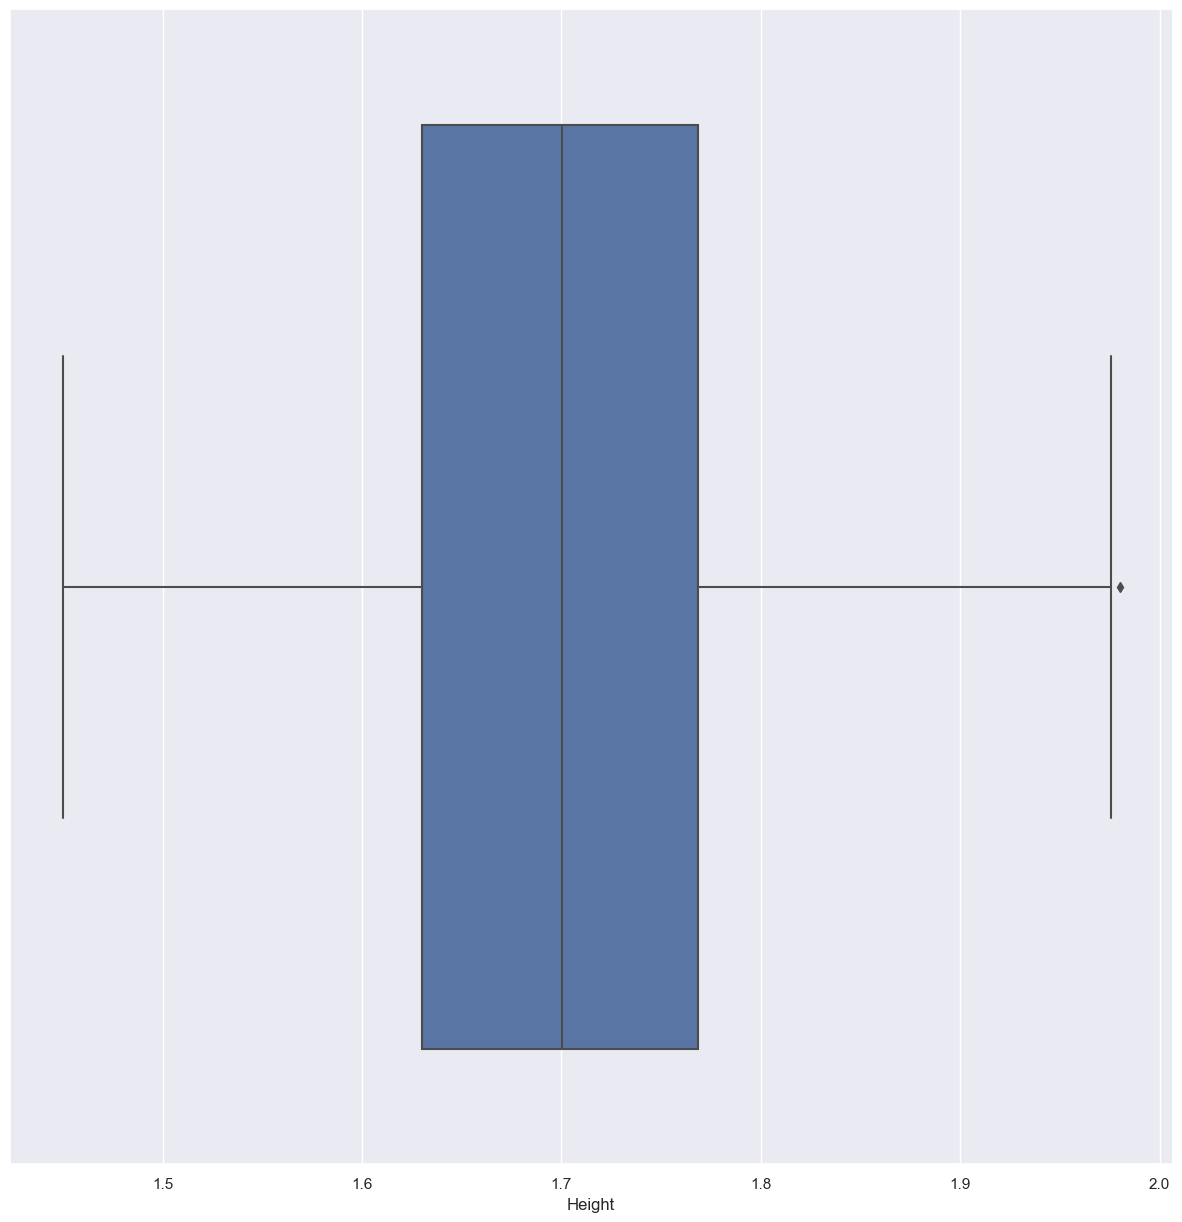

In [178]:
sns.boxplot(x=df['Height'])

Only a few points are outside the height box.


<Axes: xlabel='Weight'>

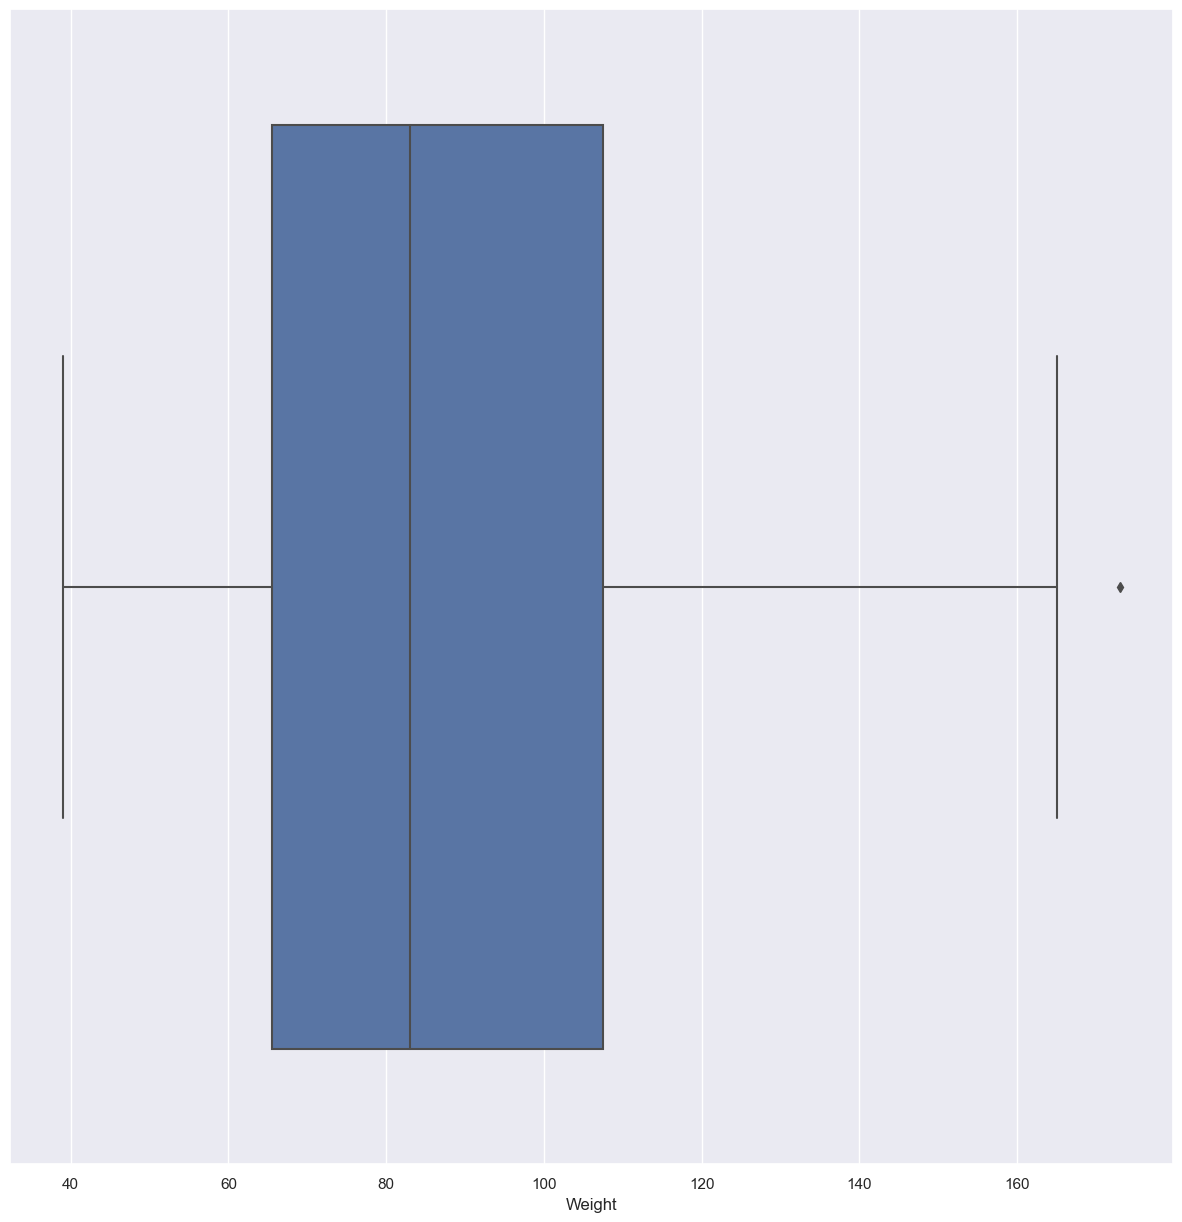

In [179]:
sns.boxplot(x=df['Weight'])

Only a few points are outside the Weight box. we will remove the extreme values.

In [180]:
df_category = df.copy()

In [181]:
# Calculate the first quartile (25th percentile) and third quartile (75th percentile) of the "Height" column
q1, q2 = df_category["Height"].quantile(q=0.26), df_category["Height"].quantile(q=0.75)

# Calculate the first quartile (25th percentile) and third quartile (75th percentile) of the "Weight" column
q3, q4 = df_category["Weight"].quantile(q=0.25), df_category["Weight"].quantile(q=0.75)

# Calculate the interquartile ranges (IQRs) for "Height" and "Weight"
IQR1, IQR2 = q2 - q1, q4 - q3

# Height selection: Remove outliers in the "Height" column based on the IQR boundaries
# Data points with heights below (q1 - 1.5 * IQR1) or above (q2 + 1.5 * IQR1) are excluded
df_category = df_category[df_category["Height"] > q1 - 1.5 * IQR1]
df_category = df_category[df_category["Height"] < q2 + 1.5 * IQR1]

# Weight selection: Remove outliers in the "Weight" column based on the IQR boundaries
# Data points with weights below (q3 - 1.5 * IQR2) or above (q4 + 1.5 * IQR2) are excluded
df_category = df_category[df_category["Weight"] > q3 - 1.5 * IQR2]
df_category = df_category[df_category["Weight"] < q4 + 1.5 * IQR2]

# Get the shape (number of rows and columns) of the updated DataFrame after outlier removal
df_category.shape


(2108, 17)

<Axes: xlabel='Weight'>

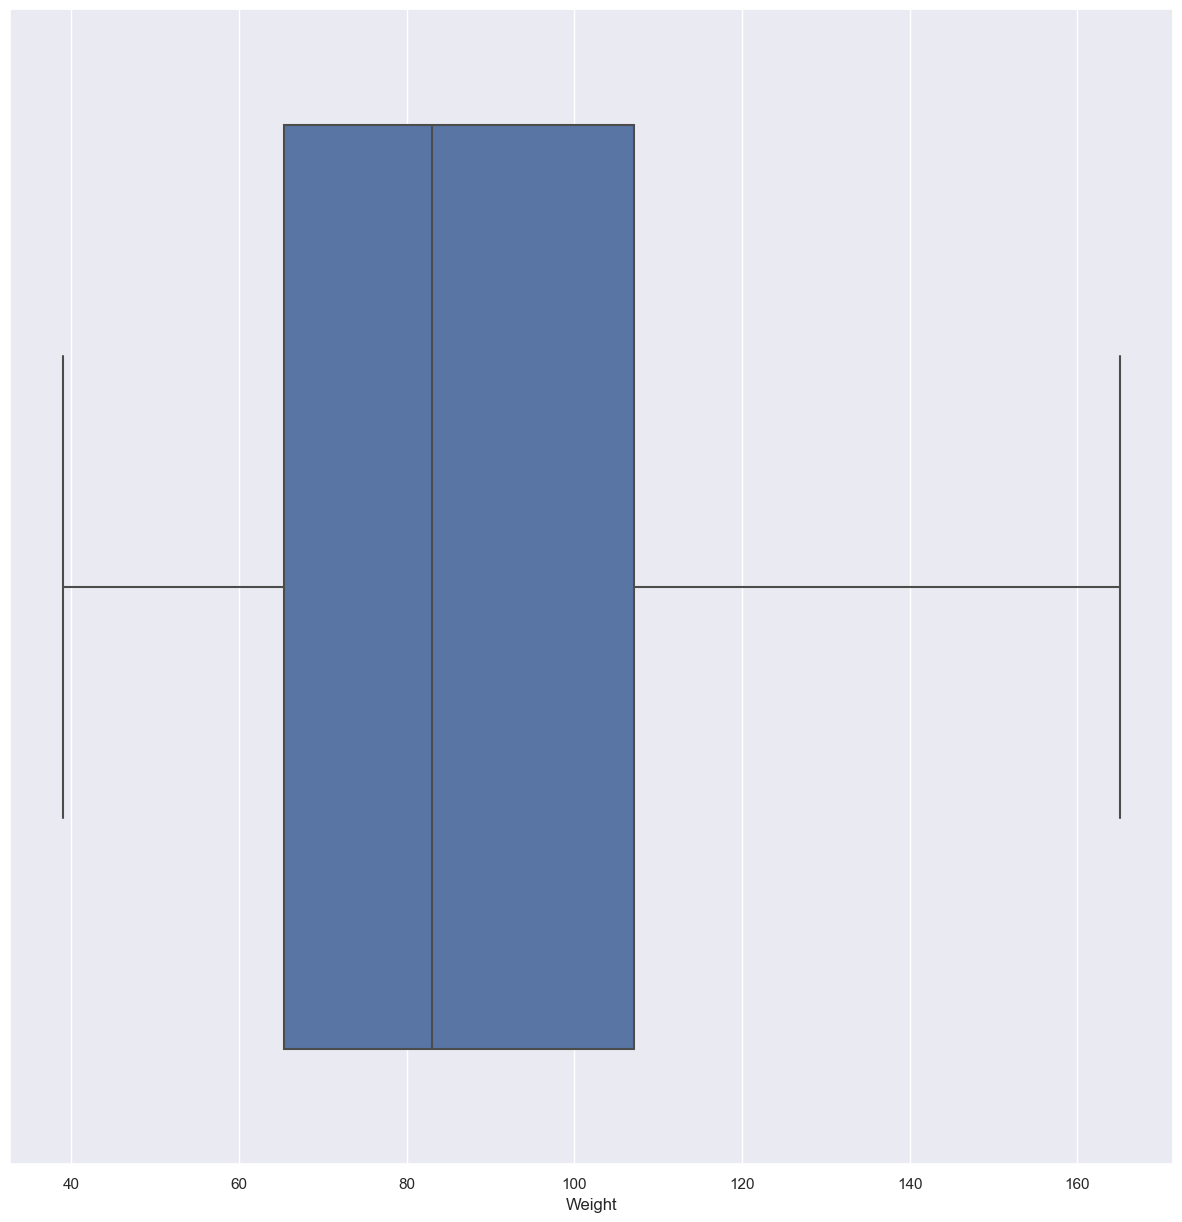

In [182]:
sns.boxplot(x=df_category['Weight'])

<Axes: xlabel='Height'>

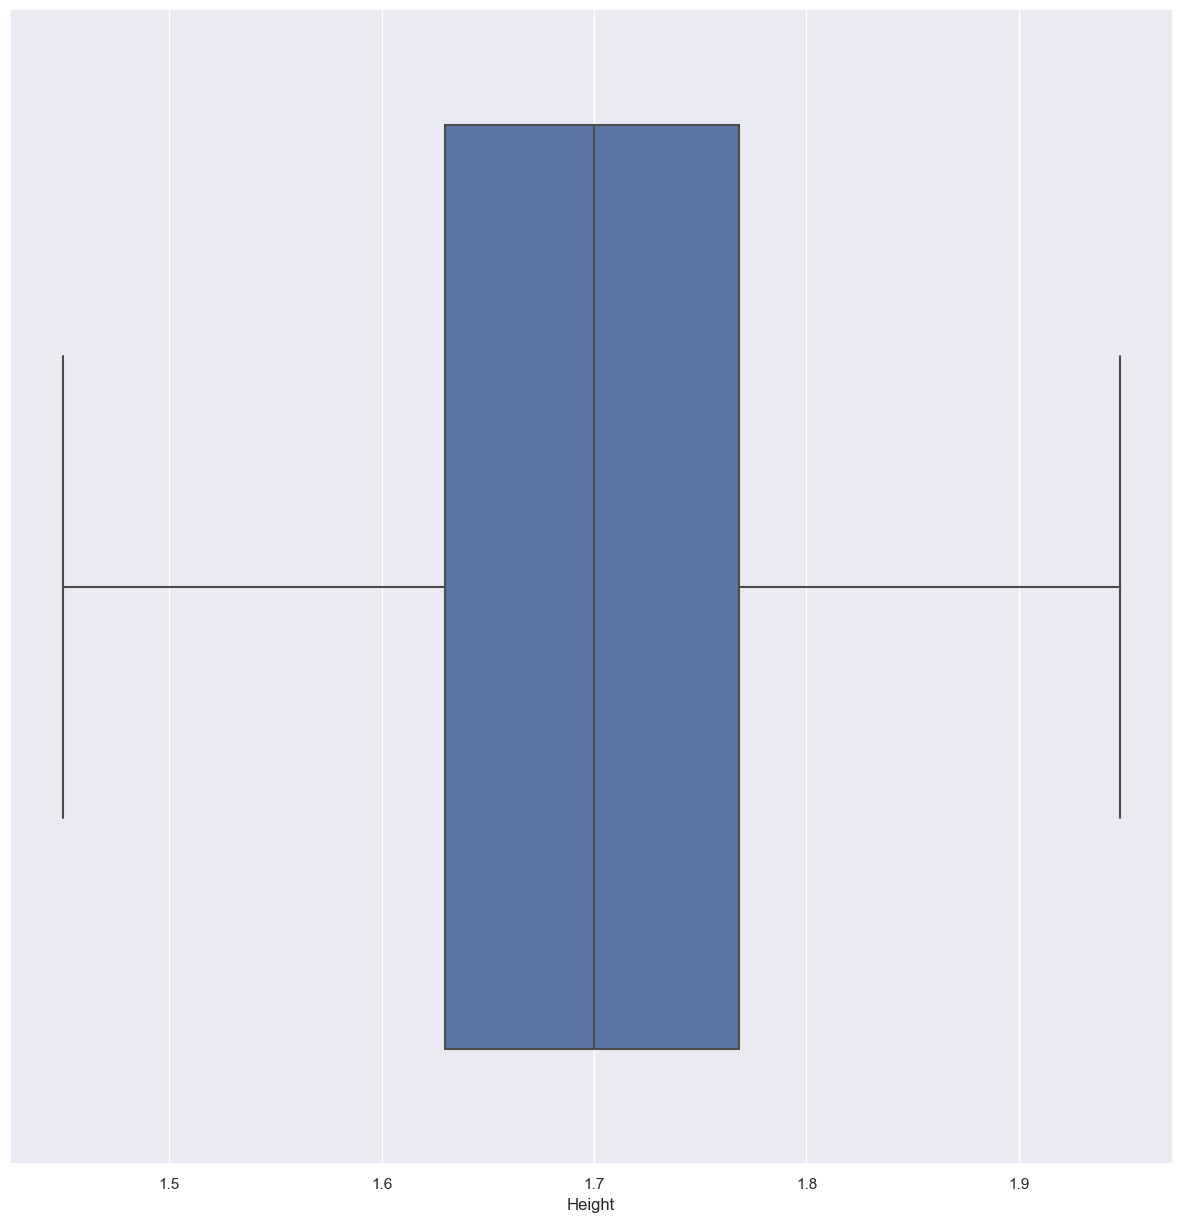

In [183]:
sns.boxplot(x=df_category['Height'])

## EDA

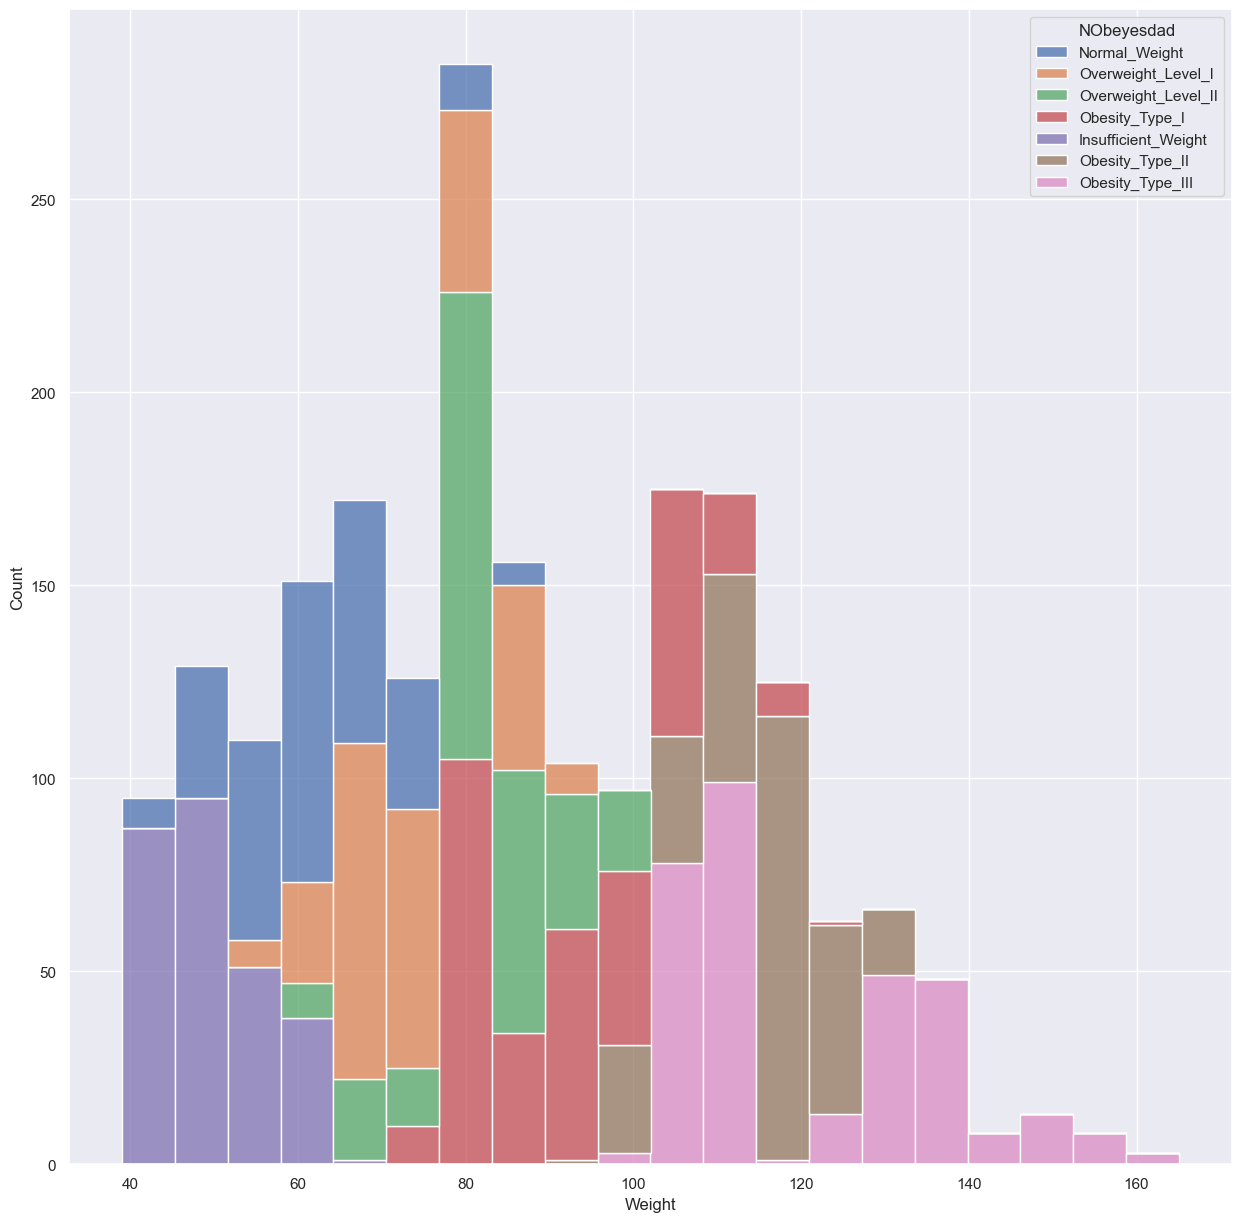

In [184]:
sns.histplot(data = df_category, x = df_category['Weight'], hue = df_category['NObeyesdad'], multiple = 'stack')
sns.set(rc = {'figure.figsize':(8,8)})

This graph shows that all of the output categories were given identical weightage while there is no data collection inconsistency in the data



C:\Users\Monty surme\AppData\Local\Temp\ipykernel_11056\1124517570.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


Text(0.5, 1.0, 'Correlation Heat-Map')

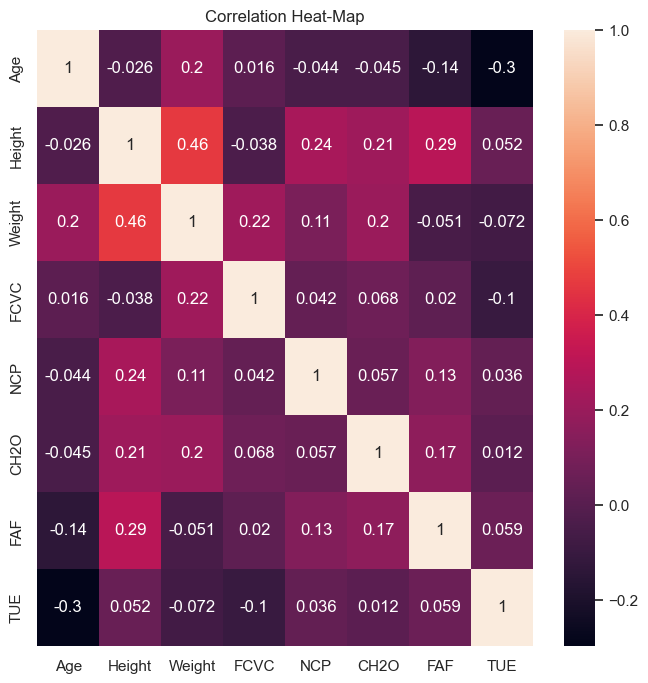

In [185]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Heat-Map")

This graph depicts the relationship between all of the numerical variables. As we can see, there is no multicollinearity in the data since the characteristics are not intercorrelated.


C:\Users\Monty surme\AppData\Local\Temp\ipykernel_11056\3169684553.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'],kde=False,bins=30)


Text(0.5, 1.0, 'Distribution plot for Height variable')

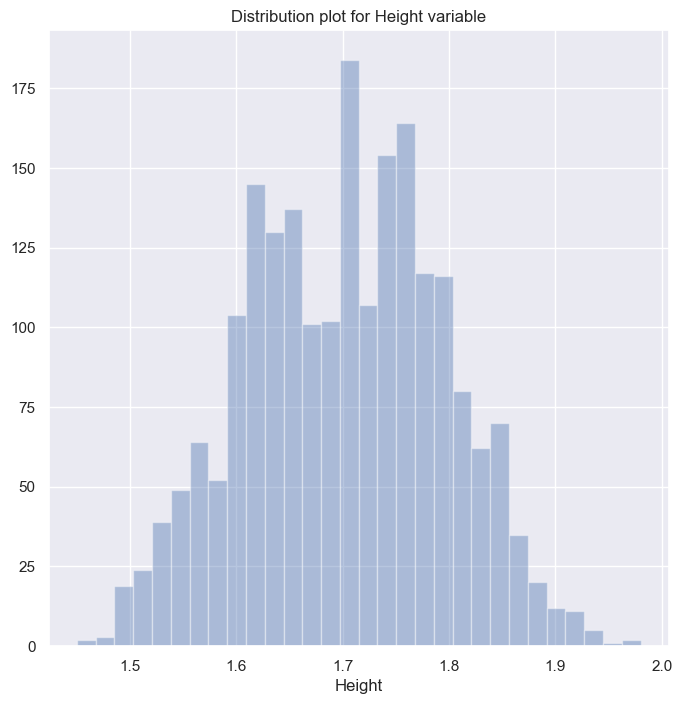

In [186]:
sns.distplot(df['Height'],kde=False,bins=30)
plt.title("Distribution plot for Height variable")

This graph depicts the height distribution in the data. The average height spans from 1.5 to 1.9 metres, with the majority of persons standing between 1.7 and 1.75 metres tall.



Text(0.5, 1.0, 'Height Vs Nobeyesdad')

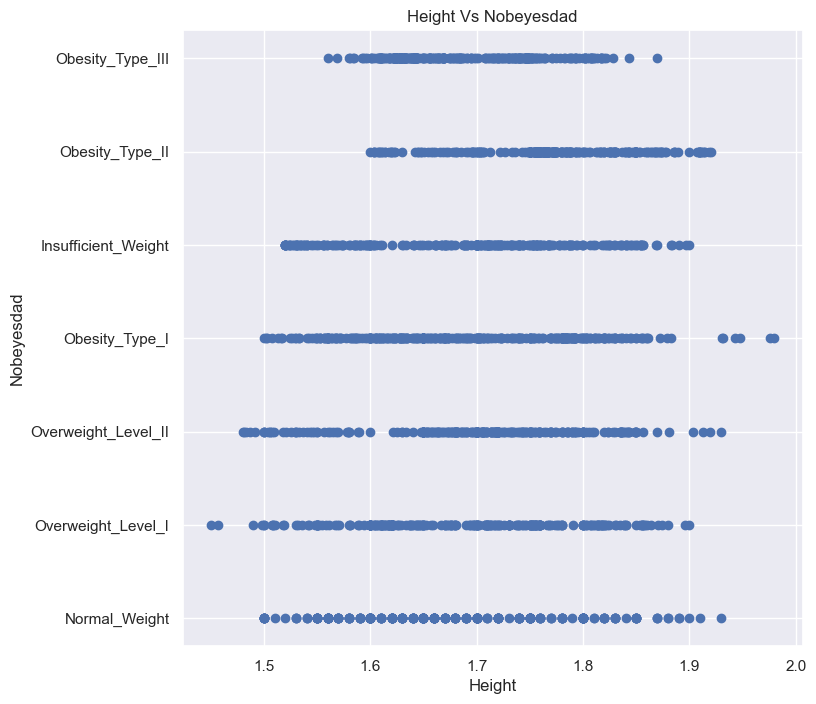

In [187]:
plt.scatter(x='Height',y='NObeyesdad',data=df)
plt.xlabel('Height')
plt.ylabel('Nobeyesdad')
plt.title("Height Vs Nobeyesdad")

According to this graph, the distribution of height is even across all obesity groups.


Text(0.5, 1.0, 'Weight Vs NObeyesdad')

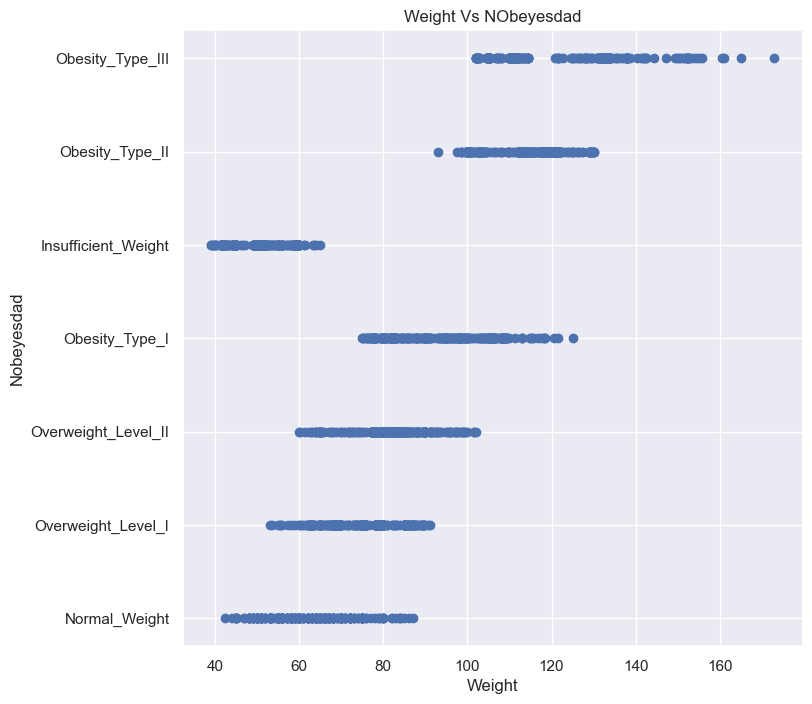

In [188]:
plt.scatter(x='Weight',y='NObeyesdad',data=df)
plt.ylabel('Nobeyesdad')
plt.xlabel('Weight')
plt.title("Weight Vs NObeyesdad")

Weight distribution is unequal between obesity categories, which is noticeable since even little weight changes impact obesity. It also displays the weight ranges for each group.


Text(0.0, 1.0, 'Height Vs Weight')

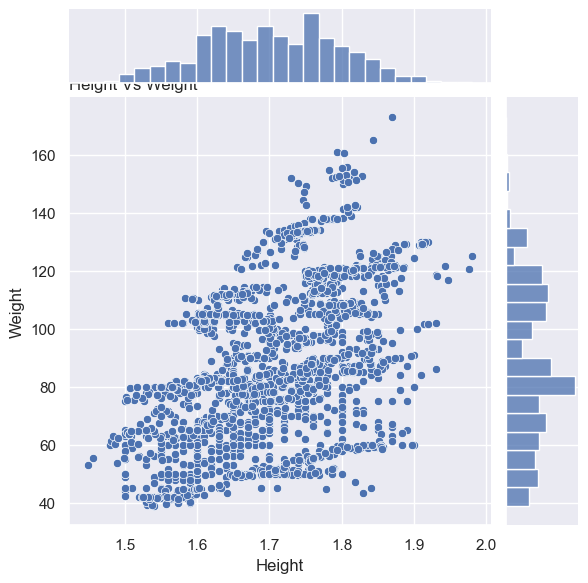

In [189]:
sns.jointplot(x='Height',y='Weight',data=df,kind='scatter')
plt.title("Height Vs Weight",loc='left')

This graph depicts the height vs. weight dispersion. There is a thick dispersion where the height is 1.5 to 1.7 and the weight is 60 to 80.


Text(0.5, 1.0, 'Age Vs NObeyesdad')

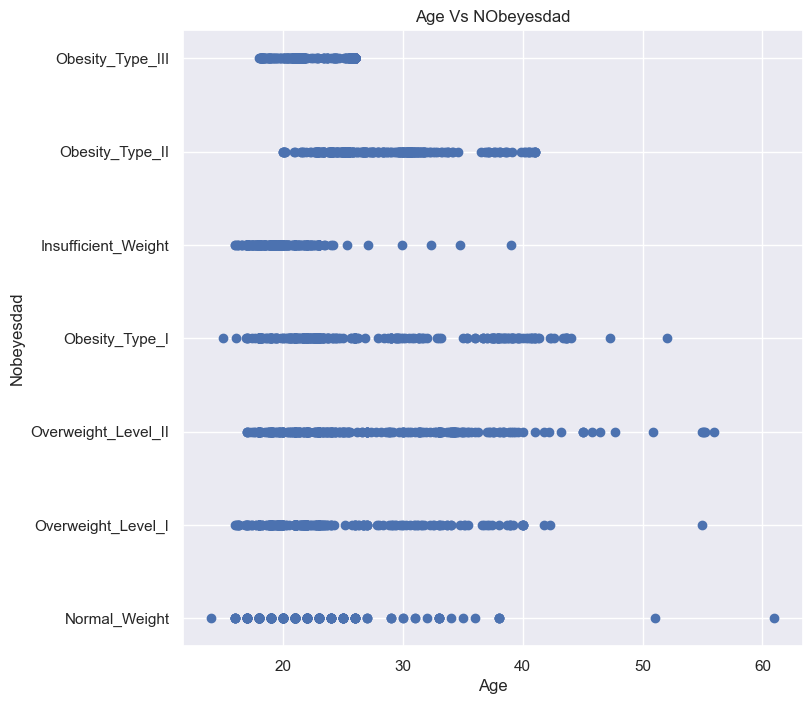

In [190]:
plt.scatter(x='Age',y='NObeyesdad',data=df)
plt.xlabel('Age')
plt.ylabel('Nobeyesdad')
plt.title("Age Vs NObeyesdad")

This shows the distribution of age over the obesity type. From this we can also
see the age group of the people lying in each category of obesity. We can also
see some outliers for age of people who fall under Normal weight category

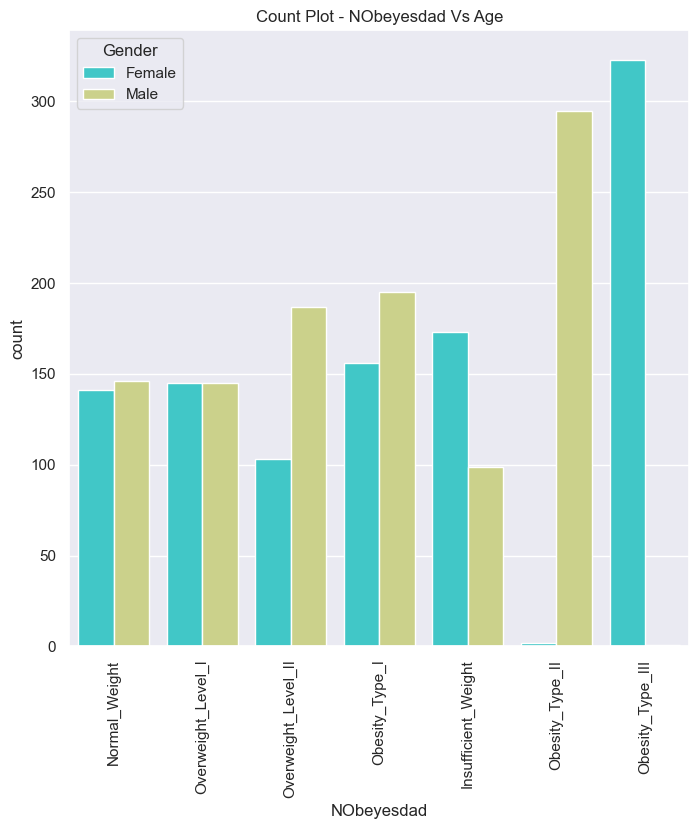

In [191]:
sns.countplot(x='NObeyesdad', hue='Gender', data=df, palette='rainbow')
plt.xticks(rotation='vertical')
plt.title("Count Plot - NObeyesdad Vs Age")
plt.show()

This graphic shows that the average age of persons classified as Overweight_Level_II and Obsity_Type_I is older than that of those classified as other types of obesity. As a result, we may conclude that Overweight_Level_II and Obesity_Type_I are not more likely to occur in persons under the age of 20.


Text(0.5, 1.0, 'Age Vs Weight')

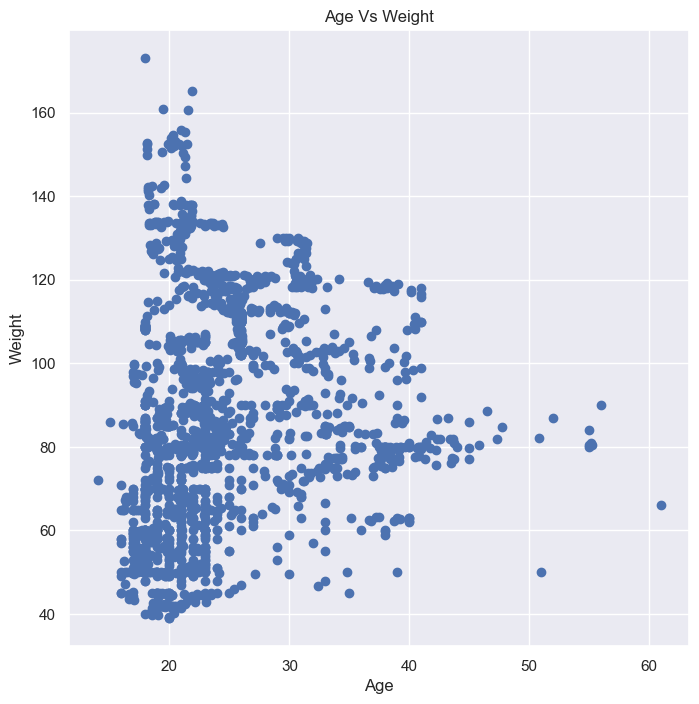

In [192]:
plt.scatter(x='Age',y='Weight',data=df)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Age Vs Weight')

This figure shows that the density is highest when the age is between 15 and 25 and the weight is between 40 and 80.


Text(0.5, 1.0, 'Consumption of water daily Vs NObeyesdad')

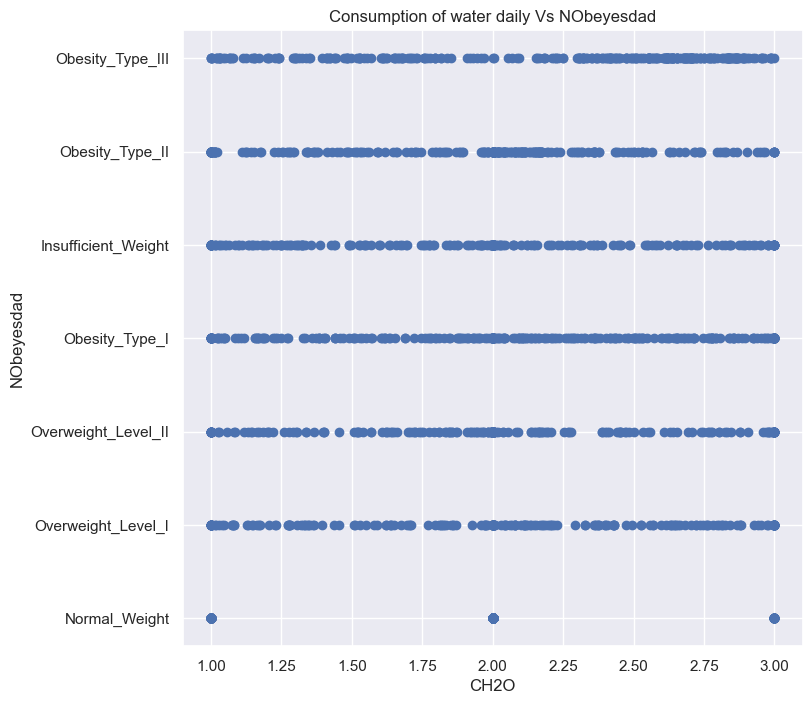

In [193]:
plt.scatter(x='CH2O',y='NObeyesdad',data=df)
plt.xlabel('CH2O')
plt.ylabel('NObeyesdad')
plt.title('Consumption of water daily Vs NObeyesdad')

This figure shows that consumption of water is olmost same in each type excpt the normal weight

In [194]:
f_count=df['Gender'].value_counts()
f_count

Male      1068
Female    1043
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Family history with overweight Vs NObeyesdad')

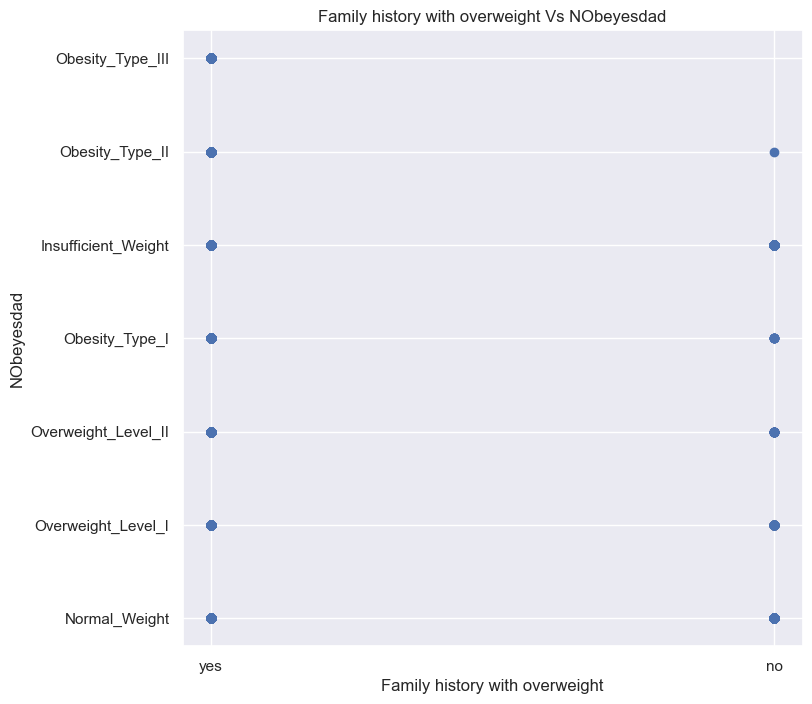

In [195]:
plt.scatter(x='family_history_with_overweight',y='NObeyesdad',data=df)
plt.xlabel('Family history with overweight')
plt.ylabel('NObeyesdad')
plt.title('Family history with overweight Vs NObeyesdad')

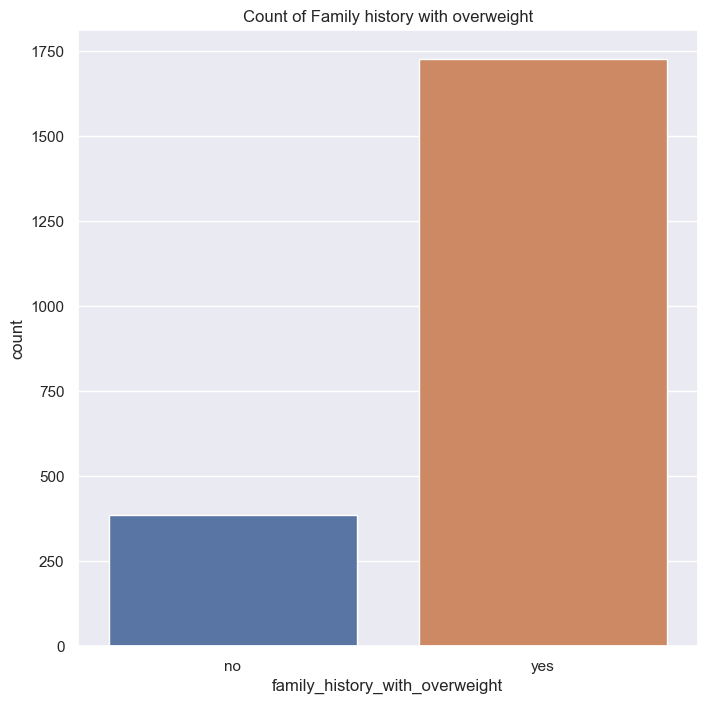

In [196]:
# Convert the 'family_history_with_overweight' column to categorical data type
df['family_history_with_overweight'] = df['family_history_with_overweight'].astype('category')

# Create the count plot
sns.countplot(x='family_history_with_overweight', data=df)
plt.title('Count of Family history with overweight')
plt.show()

From this graph we can see that there is a bias in sampling of the data in terms
of family history because we can see only a few samples of data for “no”
category and we can see more number of data for yes category

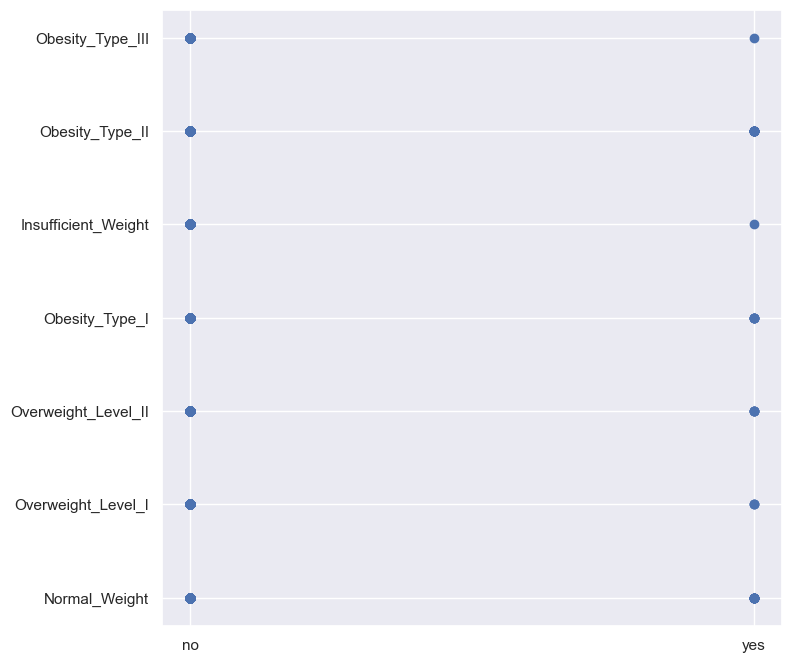

In [197]:
plt.scatter(x='SMOKE',y='NObeyesdad',data=df)

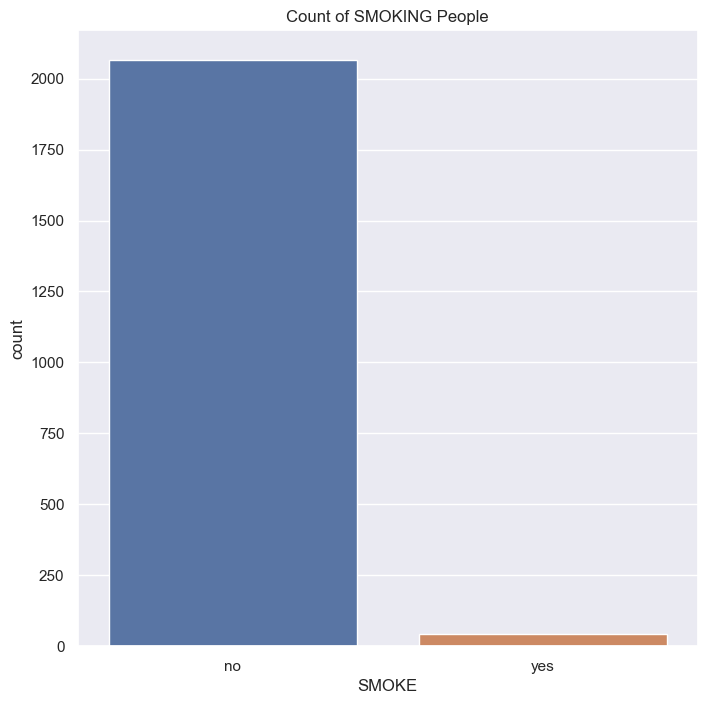

In [198]:
# Convert the 'SMOKE' column to categorical data type
df['SMOKE'] = df['SMOKE'].astype('category')

# Create the count plot
sns.countplot(x='SMOKE', data=df)
plt.title("Count of SMOKING People")
plt.show()

We can also observe a bias in the data gathering from this graph since we don't have enough data for SMOKE = "yes." 


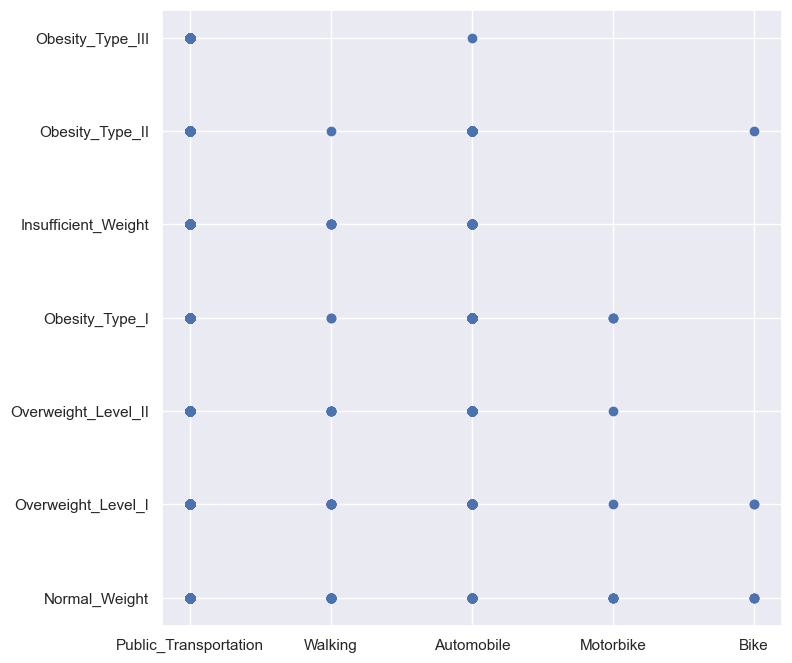

In [199]:
plt.scatter(x='MTRANS',y='NObeyesdad',data=df)

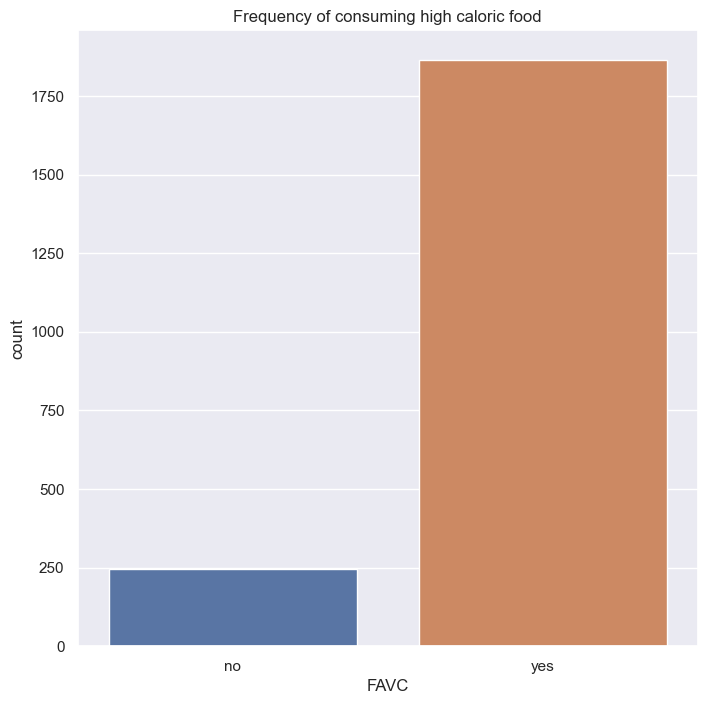

In [200]:
df['FAVC'] = df['FAVC'].astype('category')

# Create the count plot
sns.countplot(x='FAVC', data=df)
plt.title('Frequency of consuming high caloric food')
plt.show()

The graph demonstrates that those who consume high calorie foods outnumber those who do not.


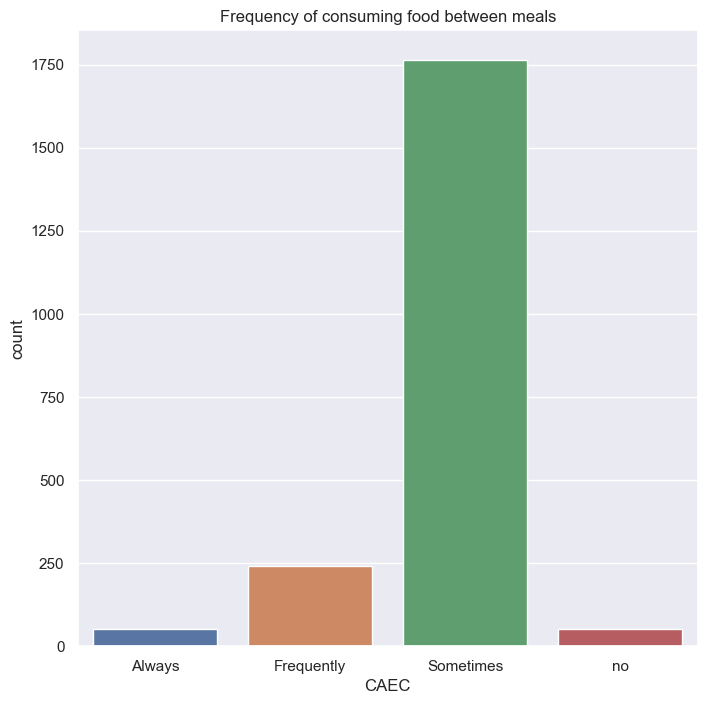

In [201]:
df['CAEC'] = df['CAEC'].astype('category')

# Create the count plot
sns.countplot(x='CAEC', data=df)
plt.title('Frequency of consuming food between meals')
plt.show()

This graph shows that people who consume food between meals sometimes
are more compared to other categories.

Text(0.5, 1.0, 'Box plot for Consumption of food between meals Vs Age')

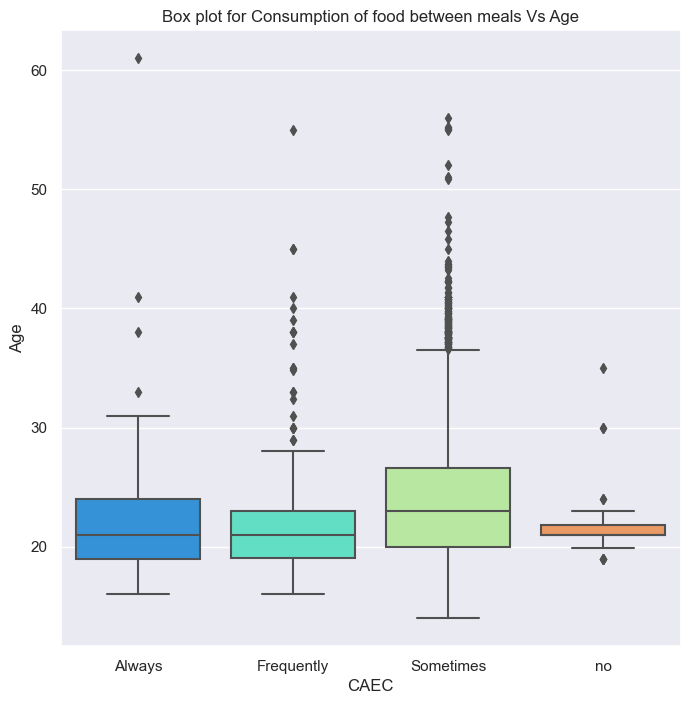

In [202]:
sns.boxplot(x="CAEC", y="Age", data=df,palette='rainbow')
plt.title('Box plot for Consumption of food between meals Vs Age')

The plot shows that people who consume food between meals
sometimes are most likely to be in the age of 20-40

Text(0.5, 1.0, 'Box plot for Consumption of Alcohol Vs Age')

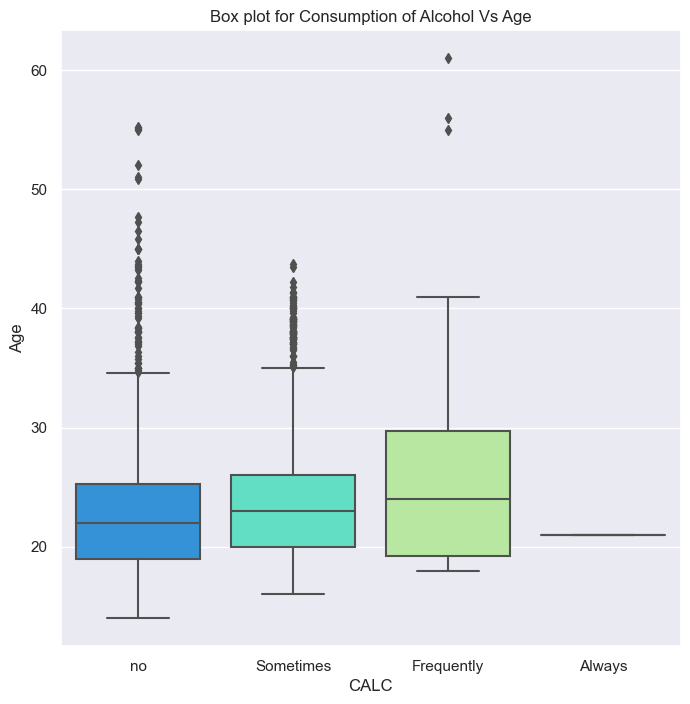

In [203]:
sns.boxplot(x="CALC", y="Age", data=df,palette='rainbow')
plt.title('Box plot for Consumption of Alcohol Vs Age')

This graph shows that consumption of alcohol sometimes is more while
compared to other categories.

Text(0.5, 1.0, 'Box plot for transportation used Vs Age')

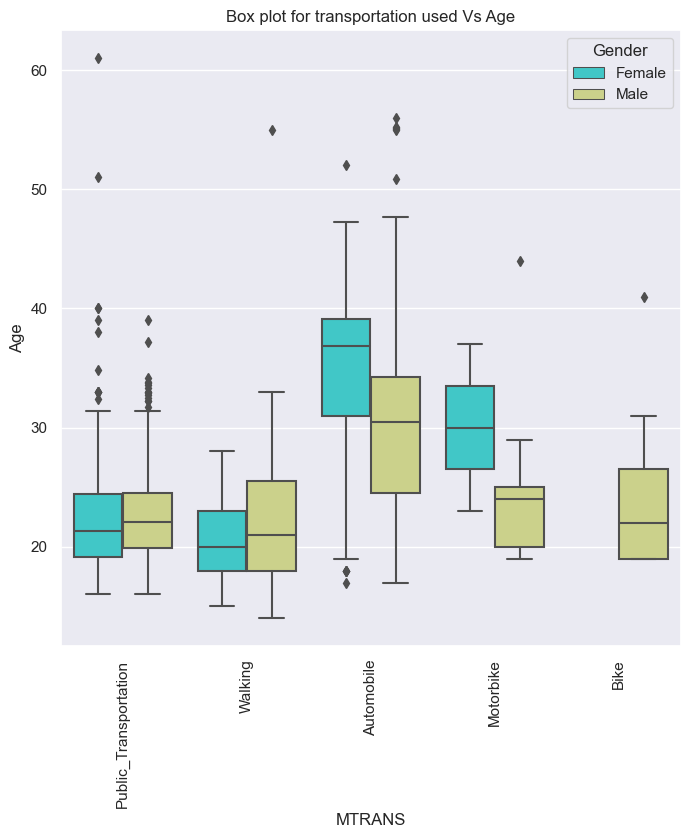

In [204]:
sns.boxplot(x="MTRANS", y="Age", hue='Gender', data=df,palette='rainbow')
plt.xticks(rotation='vertical')
plt.title('Box plot for transportation used Vs Age')

This box plot demonstrates that most alcoholic drinkers are between the ages of 20 and 30.


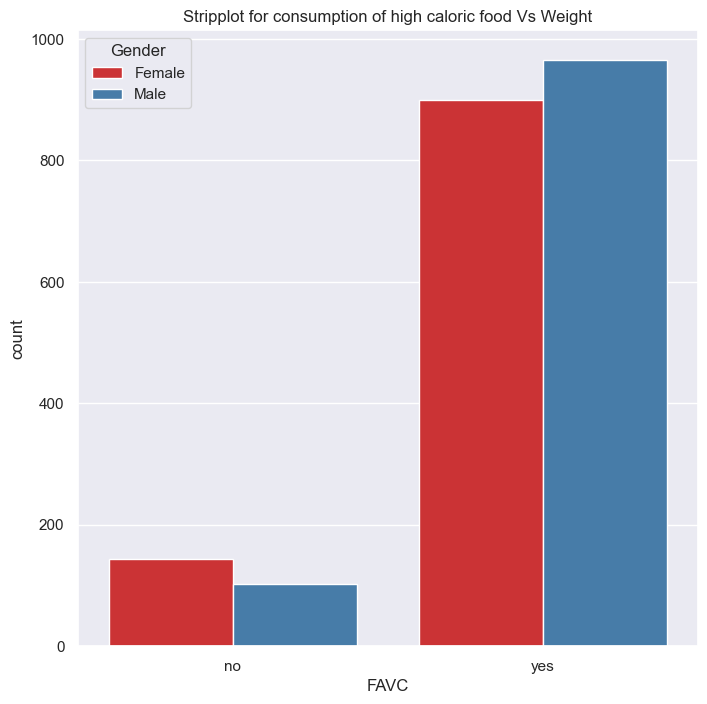

In [205]:
df['FAVC'] = df['FAVC'].astype('category')

# Create the count plot
sns.countplot(x='FAVC', data=df,hue='Gender',palette='Set1')
plt.title('Stripplot for consumption of high caloric food Vs Weight')
plt.show()

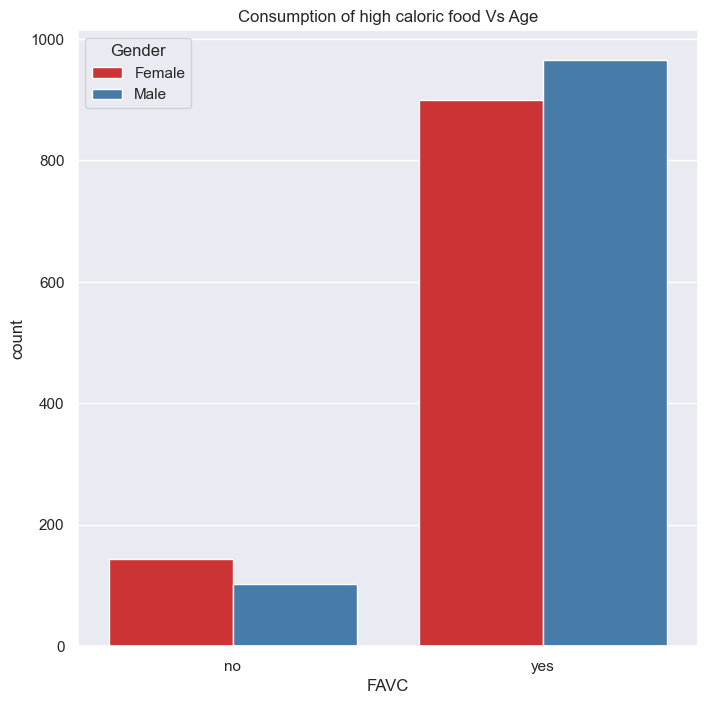

In [206]:

df['FAVC'] = df['FAVC'].astype('category')

# Create the count plot
sns.countplot(x='FAVC', hue='Gender', data=df, palette='Set1')
plt.title('Consumption of high caloric food Vs Age')
plt.show()

The graph shows that both Gender consume equal amount of caloric food as they age

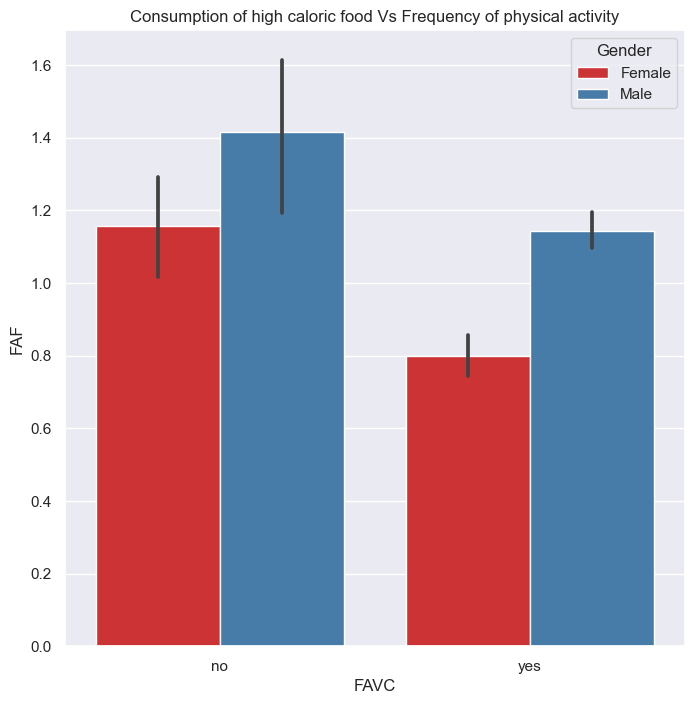

In [207]:
df['FAVC'] = df['FAVC'].astype('category')

sns.barplot(x='FAVC', y='FAF', hue='Gender', data=df, palette='Set1')
plt.title('Consumption of high caloric food Vs Frequency of physical activity')
plt.show()

C:\Users\Monty surme\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Monty surme\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Monty surme\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Consumption of food between meals Vs Age')

C:\Users\Monty surme\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Monty surme\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 62.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Monty surme\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


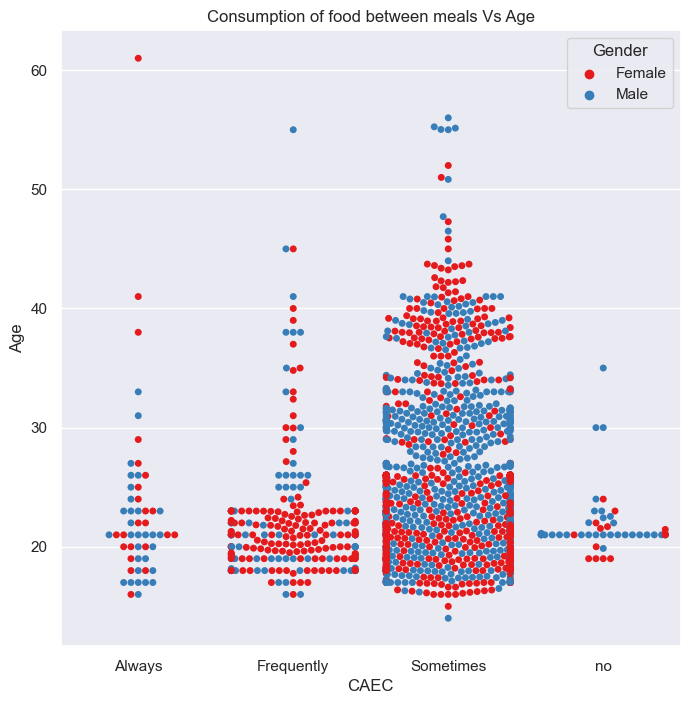

In [208]:
sns.swarmplot(x="CAEC", y="Age", data=df,hue='Gender',palette='Set1',)
plt.title('Consumption of food between meals Vs Age')

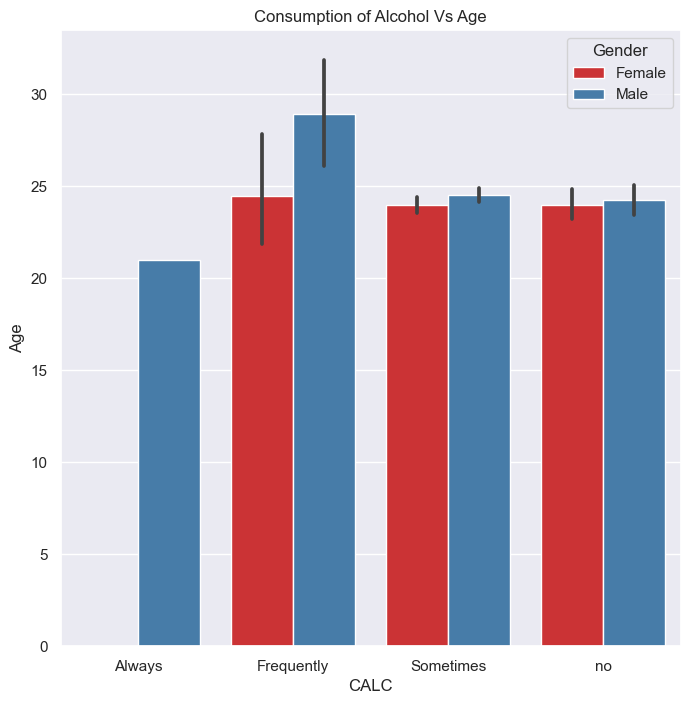

In [209]:
df['CALC'] = df['CALC'].astype('category')

sns.barplot(x='CALC', y='Age',data=df,hue='Gender', palette='Set1')
plt.title('Consumption of Alcohol Vs Age')
plt.show()

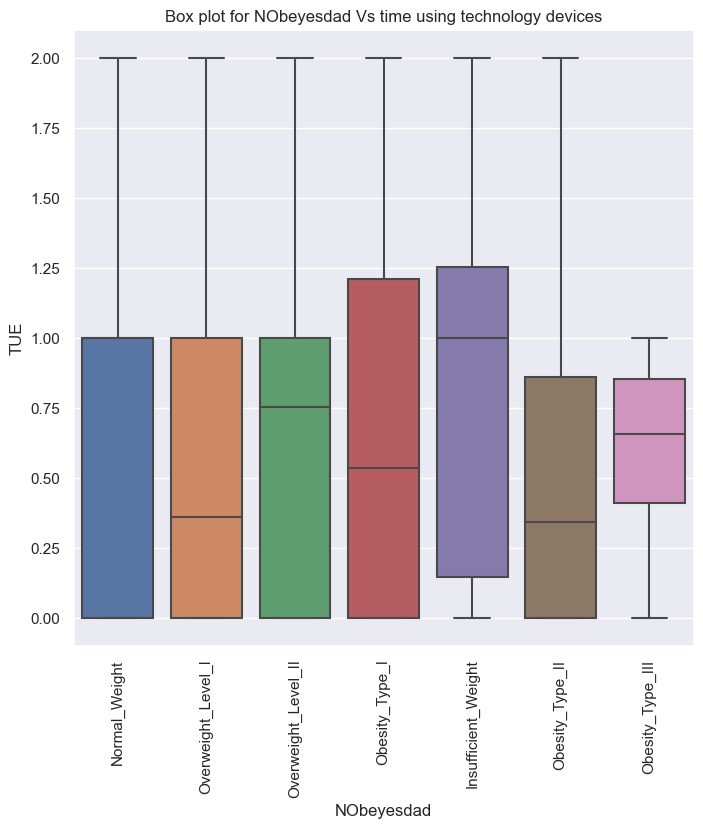

In [210]:
sns.boxplot(x='NObeyesdad', y='TUE', data=df)
plt.xticks(rotation='vertical')
plt.title('Box plot for NObeyesdad Vs time using technology devices')
plt.show()

In [211]:

target = pd.DataFrame(df_category, columns = ['NObeyesdad'])

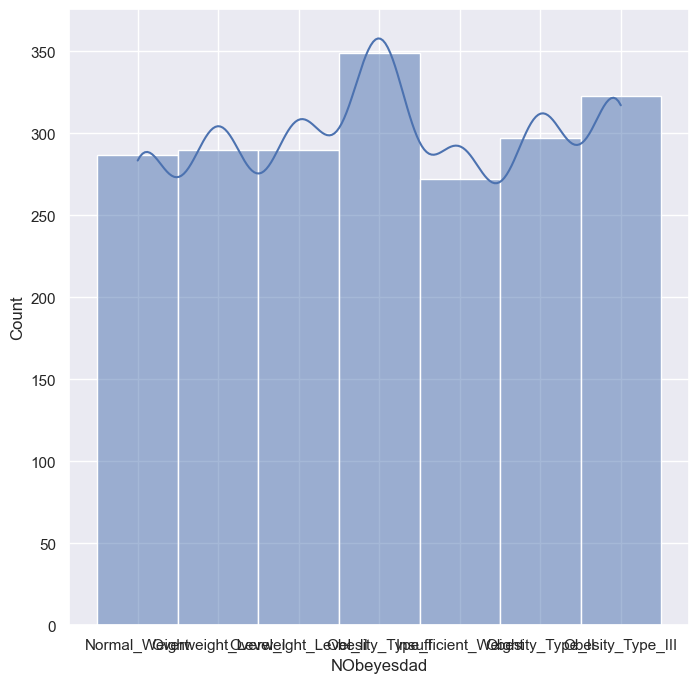

In [212]:
sns.histplot(target['NObeyesdad'], kde=True)
sns.set(rc = {'figure.figsize':(15,15)})

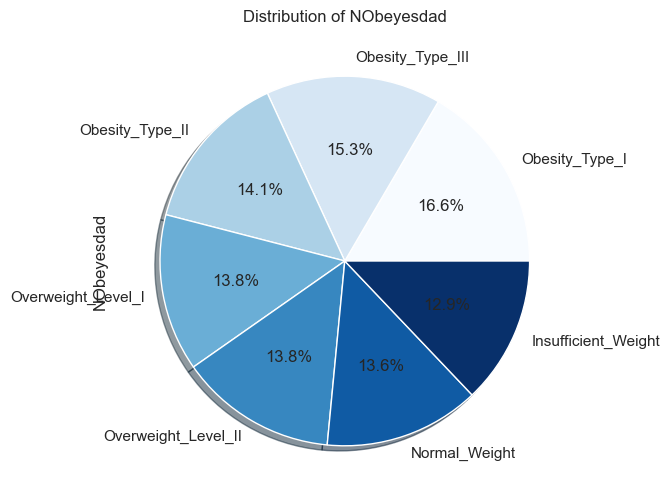

In [213]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
target['NObeyesdad'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, cmap="Blues")
plt.title('Distribution of NObeyesdad')
plt.show()

Data cleaning : part 2

Now, we can convert all our string variables into numeric ones (through categories): Let's first check what are the different possibilities for each string variables (Gender, family_history_with_overweight, 'FAVC', CAEC, SMOKE, SCC, CALC, MTRANS, NObesitydad)

In [214]:
list_var = ['Gender','family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for x in list_var:
    print(df_category[x].unique())

['Female' 'Male']
['yes' 'no']
['no' 'yes']
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'yes']
['no' 'yes']
['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


Create dictionnary with each string value and its numeric value

In [215]:
dict_Gender = {'Female' : 0, 'Male' : 1}
dict_family_history_with_overweight = {'no' : 0, 'yes' : 1}
dict_FAVC = {'no' : 0, 'yes' : 1}
dict_CAEC = {'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3}
dict_SMOKE = {'no' : 0, 'yes' : 1}
dict_SCC = {'no' : 0, 'yes' : 1}
dict_CALC = {'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3}
dict_MTRANS = {'Public_Transportation' : 0, 'Walking' : 1, 'Automobile' : 2, 'Motorbike' : 3, 'Bike' : 4}
dict_NObeyesdad = {'Normal_Weight' : 0, 'Overweight_Level_I' : 1, 'Overweight_Level_II' : 2, 'Obesity_Type_I' : 3, 'Insufficient_Weight' : 4, 'Obesity_Type_II' : 5, 'Obesity_Type_III' : 6,}
for x in list_var:
    exec("df_category['"+ x +"'] = df_category['"+ x +"'].replace(dict_"+ x +")") #transformation for each string variable

df_category.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,Overweight_Level_II


As we can see, each string values have been convert into numeric value according to their refered dictionnary.

<Axes: >

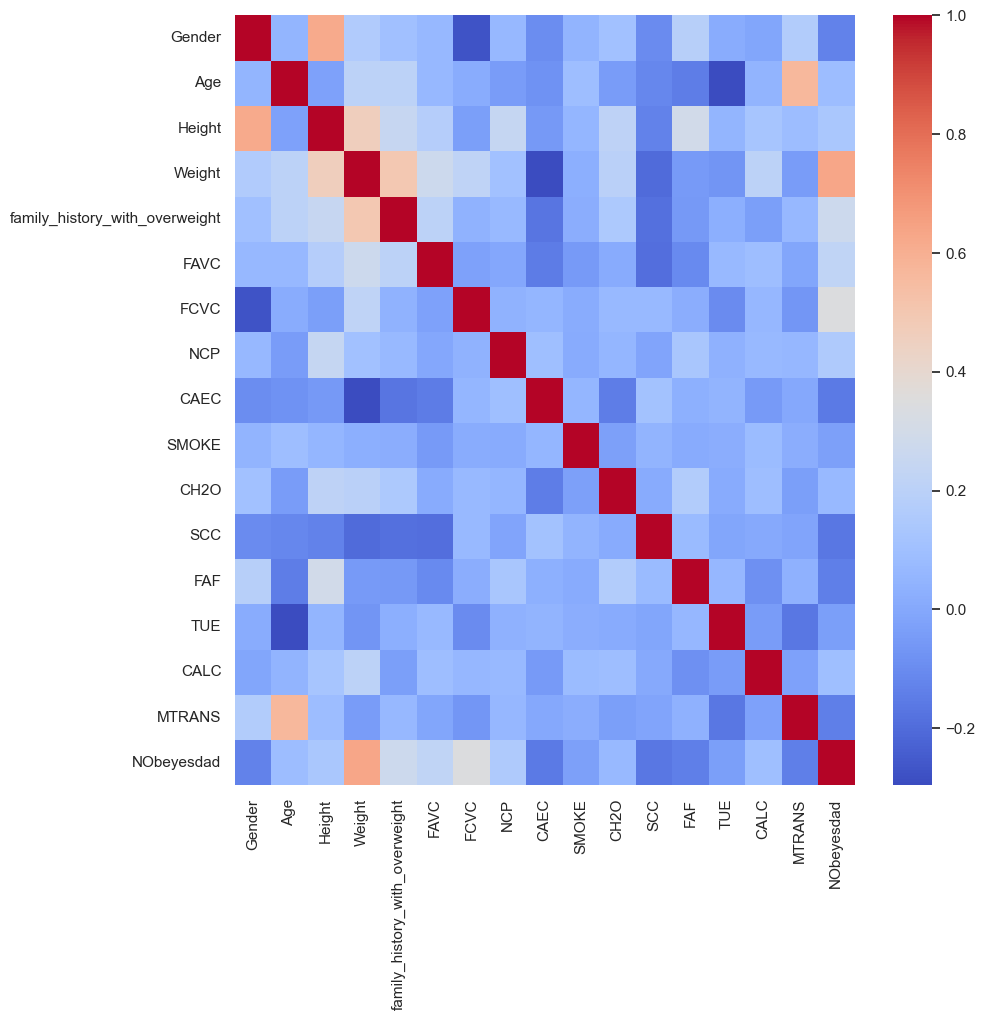

In [216]:
dfbis = df_category
dfbis["NObeyesdad"] = dfbis["NObeyesdad"].replace(dict_NObeyesdad)
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(dfbis.corr(), cmap = 'coolwarm')

We can observe that each variable is globally linearly independent of the others. As a result, ACP will be ineffective, hence we shall not conduct it. We will choose the variable that is associated with less than 30%.


In [217]:
df.corr()

C:\Users\Monty surme\AppData\Local\Temp\ipykernel_11056\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


In [218]:
# strip white spaces
def panda_strip(x):
    r =[]
    for y in x:
        if isinstance(y, str):
            y = y.strip()

        r.append(y)
    return pd.Series(r)
df = df.apply(panda_strip)

In [219]:
df.corr

<bound method DataFrame.corr of       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FA

### step 3 Feature selection

## Using Variance Threshold

In [220]:
df1=df.copy()
target=df.Weight 

In [221]:
print(df.dtypes)


Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


## Variance Threshold

In [222]:
#  Encoding Categorical Columns
# Create a list of categorical columns to be encoded
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Apply one-hot encoding to the categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

#  Variance Threshold Selection
def variance_threshold_selector(data, threshold=0.01):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

# Set the threshold value for variance selection
threshold_var = 0.01
df_var_selected = variance_threshold_selector(df_encoded, threshold_var)



## select -K Best method

In [223]:
from sklearn.feature_selection import SelectKBest, f_regression

# Step 2: Select K-Best Method
def select_k_best(data, target, k=5):
    X = data.drop(columns=[target])
    y = data[target]
    selector = SelectKBest(score_func=f_regression, k=k)
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support(indices=True)]
    return X_new, selected_features

# Set the number of top features to select
k_best_features = 5
X_k_best, selected_features_k_best = select_k_best(df_var_selected, target='Weight', k=k_best_features)


## Linear Regression Model with Feature Selection, Transformation, and Scaling

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Linear Regression Model with Feature Selection, Transformation, and Scaling
def evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Split the data into features (X) and target (y)
X = df_var_selected.drop(columns=['Weight'])
y = df_var_selected['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate the model with selected features
mse_k_best, r2_k_best = evaluate_model(X_train, X_test, y_train, y_test)


## Linear Regression Model with Correlation-Based Selected Features and Polynomial Features Transformation

In [225]:
# Apply polynomial features transformation
degree = 2  # You can adjust the degree as per your requirement
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(df_var_selected[selected_features_k_best])

# Split the transformed data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Evaluate the model with polynomial features
mse_poly, r2_poly = evaluate_model(X_train_poly, X_test_poly, y_train_poly, y_test_poly)


## Linear Regression Model with Correlation-Based Selected Features and Feature Scaling

In [226]:
# Apply feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_var_selected[selected_features_k_best])

# Split the scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Evaluate the model with scaled features
mse_scaled, r2_scaled = evaluate_model(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)


##  Linear Regression Model with Correlation-Based Features, Polynomial Features, and MinMax Scaling

In [227]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have correctly defined selected_features_k_best in Step 2
# Apply polynomial features transformation
X_poly_minmax = poly_features.fit_transform(df_var_selected[selected_features_k_best])

# Apply MinMax scaling
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X_poly_minmax)

# Split the scaled data into training and testing sets
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_scaled_minmax, y, test_size=0.2, random_state=42)

# Evaluate the model with scaled and polynomial features
mse_minmax, r2_minmax = evaluate_model(X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax)


## Linear Regression Model with Variance Threshold Selection and Polynomial Features

In [228]:
from sklearn.preprocessing import OneHotEncoder

# Categorical columns that need to be one-hot encoded
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

# Apply one-hot encoding to the categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 2: Variance Threshold Selection
def variance_threshold_selector(data, threshold=0.01):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

# Set the threshold value for variance selection
threshold_var = 0.01

# Apply variance threshold selector
df_var_selected_poly = variance_threshold_selector(df_encoded, threshold_var)
# Apply polynomial features transformation
X_poly_var = poly_features.fit_transform(df_var_selected_poly.drop(columns=['Weight']))

# Split the transformed data into training and testing sets
X_train_var, X_test_var, y_train_var, y_test_var = train_test_split(X_poly_var, y, test_size=0.2, random_state=42)

# Evaluate the model with variance threshold selected features and polynomial features
mse_var, r2_var = evaluate_model(X_train_var, X_test_var, y_train_var, y_test_var)



## Linear regression model with lasso

In [229]:
target_variable = 'Weight'
X = df.drop(columns=[target_variable])
y = df[target_variable]
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
alpha = 0.01  # Adjust this regularization strength as needed
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 26.663151460888727
R-squared (R2): 0.9621858771148553


## Data Normalization

In [230]:
# Drop the 'NObeyesdad' column from the DataFrame 'df_category' to get only the feature columns
df_features = df_category.drop(columns='NObeyesdad')

# Create a StandardScaler object and fit it to the feature data to calculate mean and standard deviation
scaler = preprocessing.StandardScaler().fit(df_features)

# Transform the feature data using the fitted scaler to standardize the features
df_scaled = pd.DataFrame(scaler.transform(df_features))

# Add the 'NObeyesdad' column (renamed as 'NObesity') back to the scaled DataFrame
df_scaled['NObesity'] = df['NObeyesdad']

# Set the column names of the scaled DataFrame to be the same as the original DataFrame 'df'
df_scaled.columns = df.columns.to_list()

# Display the first few rows of the scaled DataFrame
df_scaled.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.010491,-0.523058,-0.875632,-0.862086,0.472702,-2.75755,-0.785139,0.404487,-0.298887,-0.146006,-0.011550,-0.218435,-1.187188,0.562523,-1.417696,-0.563018,Normal_Weight
1,-1.010491,-0.523058,-1.952200,-1.168461,0.472702,-2.75755,1.087963,0.404487,-0.298887,6.849021,1.621152,4.578027,2.339294,-1.079300,0.521631,-0.563018,Normal_Weight
2,0.989617,-0.207911,1.062191,-0.364228,0.472702,-2.75755,-0.785139,0.404487,-0.298887,-0.146006,-0.011550,-0.218435,1.163800,0.562523,2.460958,-0.563018,Normal_Weight
3,0.989617,0.422383,1.062191,0.018740,-2.115496,-2.75755,1.087963,0.404487,-0.298887,-0.146006,-0.011550,-0.218435,1.163800,-1.079300,2.460958,0.588138,Overweight_Level_I
4,0.989617,-0.365484,0.846877,0.125971,-2.115496,-2.75755,-0.785139,-2.165159,-0.298887,-0.146006,-0.011550,-0.218435,-1.187188,-1.079300,0.521631,-0.563018,Overweight_Level_II


In [231]:
df_scaled_features = df_scaled.drop(columns = 'NObeyesdad')

In [232]:
X_train, X_test, Y_train, Y_test = train_test_split(df_scaled_features, df_scaled['NObeyesdad'], test_size=0.33)


In [233]:
df.to_csv('cleaned_dataset.csv', index=False)

### Pipeline

## Logistic regression

In [234]:
# Create an empty list 'perf' to store performance metrics of the models
perf = []

# Create a Logistic Regression model using the 'lbfgs' solver and maximum iterations set to 1000
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)

# Train the Logistic Regression model on the training data 'X_train' and target labels 'Y_train'
logisticRegr.fit(X_train, Y_train)

# Use the trained model to predict the target labels on the test data 'X_test'
y_pred = logisticRegr.predict(X_test)

# Print the confusion matrix to evaluate the model's performance
print("Confusion matrix:")
print(confusion_matrix(Y_test, y_pred))

# Print the classification report which includes precision, recall, f1-score, and support
print("Model summary:")
print(classification_report(Y_test, y_pred))

# Calculate the accuracy score of the model on the test data
score = accuracy_score(Y_test, y_pred)

# Print the accuracy score of the model
print("Accuracy: " + str(score))

# Append the model's performance metrics (accuracy and model name) to the 'perf' list
perf.append([score, "Logistic regression"])


Confusion matrix:
[[ 80   4   0   0   0   0   0]
 [ 18  49   3   0   1  13   6]
 [  1   2 101  12   1   1   2]
 [  0   1   2  92   0   0   1]
 [  0   1   0   0 105   0   0]
 [  0  14   3   0   0  70  16]
 [  2   3  16   1   0   9  66]]
Model summary:
                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.95      0.86        84
      Normal_Weight       0.66      0.54      0.60        90
     Obesity_Type_I       0.81      0.84      0.82       120
    Obesity_Type_II       0.88      0.96      0.92        96
   Obesity_Type_III       0.98      0.99      0.99       106
 Overweight_Level_I       0.75      0.68      0.71       103
Overweight_Level_II       0.73      0.68      0.70        97

           accuracy                           0.81       696
          macro avg       0.80      0.81      0.80       696
       weighted avg       0.80      0.81      0.80       696

Accuracy: 0.8089080459770115


## Gradient Boosting Classifier

In [235]:
# Create a Gradient Boosting Classifier model with a random_state set to 123 for reproducibility
gbdt = GradientBoostingClassifier(random_state=123)

# Train the Gradient Boosting Classifier model on the training data 'X_train' and target labels 'Y_train'
gbdt.fit(X_train, Y_train)

# Use the trained model to predict the target labels on the test data 'X_test'
gbdt_pre = gbdt.predict(X_test)


In [236]:
# Print the Confusion Matrix to evaluate the performance of the Gradient Boosting Classifier on the test data
print("Confusion matrix:")
print(confusion_matrix(Y_test, gbdt_pre))

# Print the Model Summary using the Classification Report, which includes precision, recall, f1-score, and support for each class
print("Model summary:")
print(classification_report(Y_test, gbdt_pre))

# Calculate the Accuracy Score of the Gradient Boosting Classifier on the test data
score = accuracy_score(Y_test, gbdt_pre)

# Print the Accuracy Score of the Gradient Boosting Classifier
print("Accuracy: " + str(score))

# Append the model's performance metrics (accuracy and model name "Gradient Boosting Classifier") to the 'perf' list
perf.append([score, "Gradient Boosting Classifier"])


Confusion matrix:
[[ 76   5   0   0   0   3   0]
 [  3  73   2   0   1   7   4]
 [  1   2 111   5   0   1   0]
 [  0   2   0  94   0   0   0]
 [  0   0   0   1 104   0   1]
 [  1  10   1   0   0  86   5]
 [  0   7   7   0   0  10  73]]
Model summary:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.90      0.92        84
      Normal_Weight       0.74      0.81      0.77        90
     Obesity_Type_I       0.92      0.93      0.92       120
    Obesity_Type_II       0.94      0.98      0.96        96
   Obesity_Type_III       0.99      0.98      0.99       106
 Overweight_Level_I       0.80      0.83      0.82       103
Overweight_Level_II       0.88      0.75      0.81        97

           accuracy                           0.89       696
          macro avg       0.89      0.88      0.88       696
       weighted avg       0.89      0.89      0.89       696

Accuracy: 0.8864942528735632


## SVM

In [237]:
parameters = {'C':[4,2,3,5,6], "degree":[1,3,5,2,4],'gamma':[0.5,0.1,0.15,0.6,0.8,0.9],"kernel":["rbf","poly","sigmoid"]}
grid=GridSearchCV(svm.SVC(),parameters,n_jobs=-1)
grid.fit(X_train,Y_train)
print(grid.best_score_,grid.best_estimator_)

0.8895346214570333 SVC(C=6, degree=1, gamma=0.8, kernel='poly')


In [238]:
# Create an instance of the Support Vector Machine (SVM) classifier with the specified hyperparameters
# C is the regularization parameter, degree is the degree of the polynomial kernel function, gamma is the kernel coefficient, and kernel is the type of kernel used.
clf2 = svm.SVC(C=6, degree=1, gamma=0.9, kernel='poly')

# Train the SVM classifier on the training data 'X_train' and target labels 'Y_train'
clf2.fit(X_train, Y_train)

# Use the trained SVM classifier to predict the target labels on the test data 'X_test'
pred_svm2 = clf2.predict(X_test)

# Print the Confusion Matrix to evaluate the performance of the SVM classifier on the test data
print("Confusion matrix:")
print(confusion_matrix(Y_test, pred_svm2))

# Print the Model Summary using the Classification Report, which includes precision, recall, f1-score, and support for each class
print("Model summary:")
print(classification_report(Y_test, pred_svm2))

# Calculate the Accuracy Score of the SVM classifier on the test data
score = accuracy_score(Y_test, pred_svm2)

# Print the Accuracy Score of the SVM classifier
print("Accuracy: " + str(score))

# Append the model's performance metrics (accuracy and model name "SVM2") to the 'perf' list
perf.append([score, "SVM2"])


Confusion matrix:
[[ 82   1   0   0   0   1   0]
 [ 12  67   3   0   1   4   3]
 [  1   2 111   3   0   1   2]
 [  0   2   0  94   0   0   0]
 [  0   0   0   0 105   0   1]
 [  0  11   3   0   0  82   7]
 [  1   4   5   0   0   4  83]]
Model summary:
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.98      0.91        84
      Normal_Weight       0.77      0.74      0.76        90
     Obesity_Type_I       0.91      0.93      0.92       120
    Obesity_Type_II       0.97      0.98      0.97        96
   Obesity_Type_III       0.99      0.99      0.99       106
 Overweight_Level_I       0.89      0.80      0.84       103
Overweight_Level_II       0.86      0.86      0.86        97

           accuracy                           0.90       696
          macro avg       0.89      0.90      0.89       696
       weighted avg       0.90      0.90      0.90       696

Accuracy: 0.896551724137931


## Naive Bayes

In [239]:
gnb = GaussianNB()

# Train the GNB classifier on the training data 'X_train' and corresponding target labels 'Y_train'
y_gnb = gnb.fit(X_train, Y_train).predict(X_test)

# Print the Confusion Matrix to evaluate the performance of the GNB classifier on the test data
print("Confusion matrix:")
print(confusion_matrix(Y_test, y_gnb))

# Print the Model Summary using the Classification Report, which includes precision, recall, f1-score, and support for each class
print("Model summary:")
print(classification_report(Y_test, y_gnb))

# Calculate the Accuracy Score of the GNB classifier on the test data
score = accuracy_score(Y_test, y_gnb)

# Print the Accuracy Score of the GNB classifier
print("Accuracy: " + str(score))

# Append the model's performance metrics (accuracy and model name "Naive Bayes") to the 'perf' list
perf.append([score, "Naive Bayes"])


Confusion matrix:
[[ 79   2   0   0   0   0   3]
 [ 65   6   0   0   1   0  18]
 [  2   1   0   8   8   0 101]
 [  1   0   0  66   8   0  21]
 [  0   0   0   0 105   0   1]
 [ 34   1   0   0   3   0  65]
 [  8   1   0   0   5   0  83]]
Model summary:
                     precision    recall  f1-score   support

Insufficient_Weight       0.42      0.94      0.58        84
      Normal_Weight       0.55      0.07      0.12        90
     Obesity_Type_I       0.00      0.00      0.00       120
    Obesity_Type_II       0.89      0.69      0.78        96
   Obesity_Type_III       0.81      0.99      0.89       106
 Overweight_Level_I       0.00      0.00      0.00       103
Overweight_Level_II       0.28      0.86      0.43        97

           accuracy                           0.49       696
          macro avg       0.42      0.51      0.40       696
       weighted avg       0.41      0.49      0.39       696

Accuracy: 0.4870689655172414


C:\Users\Monty surme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Monty surme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Monty surme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest


In [240]:
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X_train, Y_train)
rf_pred=rf.predict(X_test)

In [241]:
print("confusion matrix")
print(confusion_matrix(Y_test,rf_pred))
print("model summary : ")
print(classification_report(Y_test,rf_pred))
score = accuracy_score(Y_test, rf_pred)
print("accuracy : "+str(score))
perf.append([score,"Random Forest"])

confusion matrix
[[ 79   4   0   0   0   1   0]
 [  4  77   2   0   1   3   3]
 [  0   3 115   1   0   1   0]
 [  0   2   0  94   0   0   0]
 [  0   0   0   0 105   0   1]
 [  0  16   1   0   0  84   2]
 [  0   7   3   0   0   6  81]]
model summary : 
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.94      0.95        84
      Normal_Weight       0.71      0.86      0.77        90
     Obesity_Type_I       0.95      0.96      0.95       120
    Obesity_Type_II       0.99      0.98      0.98        96
   Obesity_Type_III       0.99      0.99      0.99       106
 Overweight_Level_I       0.88      0.82      0.85       103
Overweight_Level_II       0.93      0.84      0.88        97

           accuracy                           0.91       696
          macro avg       0.91      0.91      0.91       696
       weighted avg       0.92      0.91      0.91       696

accuracy : 0.9123563218390804


## Out of Sample Predection

In [242]:
df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
5%,17.891428,1.548291,48.500000,1.523214,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
95%,38.098070,1.850000,131.916152,3.000000,3.750881,3.000000,2.677133,2.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [243]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
new_data = pd.read_csv('cleaned_dataset.csv')
# Drop the target column (Weight) if it exists
if 'Weight' in new_data.columns:
    new_data_features = new_data.drop(columns=['Weight'])
else:
    new_data_features = new_data.copy()
encoded_new_data_features = pd.get_dummies(new_data_features, columns=categorical_columns, drop_first=True)


# Add missing columns with value 0
for column in X_train.columns:
    if column not in encoded_new_data_features.columns:
        encoded_new_data_features[column] = 0

# Reorder columns to match the order in the training data
encoded_new_data_features = encoded_new_data_features[X_train.columns]

# Split the new data into features (X) and target (Y)
X_new_data = encoded_new_data_features
Y_new_data = new_data['NObeyesdad']

# Make predictions on the new data using the final model
predictions_new_data = rf.predict(X_new_data)

# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(Y_new_data, predictions_new_data)
confusion_mat = confusion_matrix(Y_new_data, predictions_new_data)
classification_report_summary = classification_report(Y_new_data, predictions_new_data)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_report_summary)


Accuracy: 0.13737565135007104
Confusion Matrix:
[[  0   0   0   0   0 272   0]
 [  0   0   0   0   0 287   0]
 [  0   0   0   0   0 351   0]
 [  0   0   0   0   0 297   0]
 [  0   0   0   0   0 324   0]
 [  0   0   0   0   0 290   0]
 [  0   0   0   0   0 290   0]]
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.00      0.00      0.00       272
      Normal_Weight       0.00      0.00      0.00       287
     Obesity_Type_I       0.00      0.00      0.00       351
    Obesity_Type_II       0.00      0.00      0.00       297
   Obesity_Type_III       0.00      0.00      0.00       324
 Overweight_Level_I       0.14      1.00      0.24       290
Overweight_Level_II       0.00      0.00      0.00       290

           accuracy                           0.14      2111
          macro avg       0.02      0.14      0.03      2111
       weighted avg       0.02      0.14      0.03      2111



C:\Users\Monty surme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Monty surme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Monty surme\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
